In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()

In [3]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [4]:
X=iris.data
y=iris.target

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier(criterion="gini",max_depth=5,random_state=42)
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [7]:
tree_clf.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [8]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred=tree_clf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print("DT Accuracy:",accuracy)

DT Accuracy: 1.0


In [9]:
conf_matrix=confusion_matrix(y_test,y_pred)
print("confusion matrix result:",conf_matrix)

confusion matrix result: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


[Text(0.3076923076923077, 0.9166666666666666, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = versicolor'),
 Text(0.23076923076923078, 0.75, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.38461538461538464, 0.75, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = versicolor'),
 Text(0.15384615384615385, 0.5833333333333334, 'petal width (cm) <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.4166666666666667, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.6153846153846154, 0.5833333333333334, 'petal width (cm) <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]\nclass = virginica'),
 Text(0.38461538461538464, 0.4166666666666667, 'petal length (cm) <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0

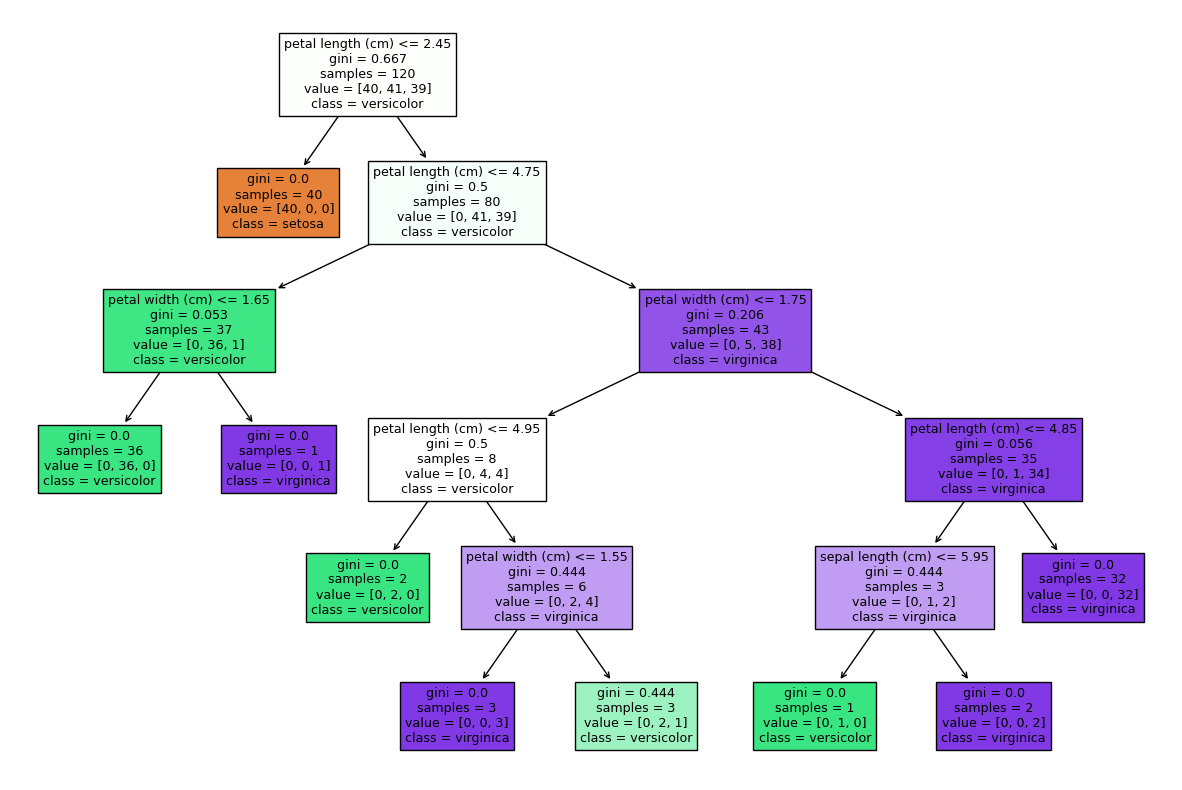

In [10]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(tree_clf,filled=True,feature_names=iris.feature_names,class_names=list(iris.target_names))

In [11]:
feature_importances=tree_clf.feature_importances_
feature_names=iris.feature_names
feature_importances_sorted=sorted(zip(feature_importances,feature_names),reverse=True)
for importance, feature_name in feature_importances_sorted:
    print(f"{feature_name}:{importance}")

petal length (cm):0.9045522597319637
petal width (cm):0.07849499604256478
sepal length (cm):0.016952744225471498
sepal width (cm):0.0


**Feature Selection**


/tmp/ipykernel_18/1552173227.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx,0],X[idx,1],c=color,label=iris.target_names[i],cmap=plt.cm.RdYlBu,
/tmp/ipykernel_18/1552173227.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx,0],X[idx,1],c=color,label=iris.target_names[i],cmap=plt.cm.RdYlBu,
/tmp/ipykernel_18/1552173227.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx,0],X[idx,1],c=color,label=iris.target_names[i],cmap=plt.cm.RdYlBu,
/tmp/ipykernel_18/1552173227.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx,0],X[idx,1],c=color,label=iris.target_names[i],cmap=plt.cm.RdYlBu,
/tmp/ipykernel_18/1552173227.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx,0]

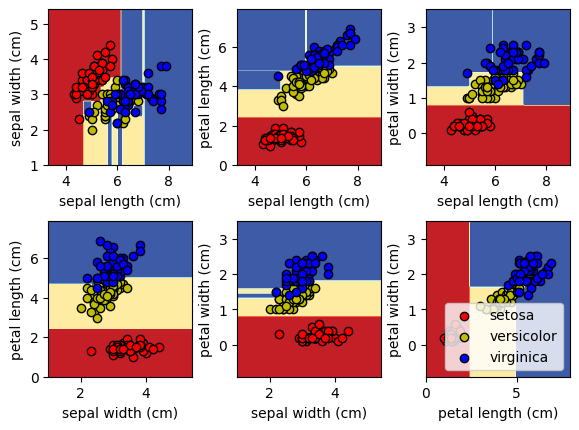

In [12]:
from sklearn.inspection import DecisionBoundaryDisplay
iris=load_iris()

n_classes=len(iris.target_names)
plot_colors="ryb"
#plt.figure(figsize=(15,10))

for pairidx,pair in enumerate([[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]):
    X=iris.data[:,pair]
    y=iris.target

    clf=DecisionTreeClassifier().fit(X,y)
    ax=plt.subplot(2,3,pairidx+1)
    plt.tight_layout(h_pad=0.5,w_pad=0.5,pad=2.5)
    DecisionBoundaryDisplay.from_estimator(clf,
                                           X,
                                          cmap=plt.cm.RdYlBu,
                                          response_method="predict",
                                          ax=ax,
                                          xlabel=iris.feature_names[pair[0]],
                                          ylabel=iris.feature_names[pair[1]])
    for i, color in zip(range(n_classes),plot_colors):
        idx=np.where(y==i)
        plt.scatter(X[idx,0],X[idx,1],c=color,label=iris.target_names[i],cmap=plt.cm.RdYlBu,
                   edgecolors="black")
plt.legend()